In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [26]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [27]:
treino

1348     Embora o filme tenha sido apenas assim, o clos...
27466    Este é provavelmente um dos piores filmes que ...
29998    De vez em quando, um filme irá varrer ao seu r...
48186    Este é um conto completamente diabólico de quã...
26473    Lenta, chata, extremamente repetitiva. Não adm...
                               ...                        
11284    Naach teria ganhado um Razzie para o Pior Film...
44732    Apenas assisti a esse filme em DVD e achei a a...
38158    Melhor show desde Seinfeld. Ela é realmente mu...
860      Eu pareço estar discordando com muitas pessoas...
15795    Minhas duas filhas de 11 e 13 anos e eu tive s...
Name: text_pt, Length: 37094, dtype: object

In [28]:
classe_treino


1348     neg
27466    neg
29998    neg
48186    pos
26473    neg
        ... 
11284    neg
44732    pos
38158    pos
860      neg
15795    pos
Name: sentiment, Length: 37094, dtype: object

In [29]:
resenha.text_pt[1348]

'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

In [30]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [31]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [32]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

In [33]:
resenha["classificacao"] = classificacao

In [34]:
resenha.head()


,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [35]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [36]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

todas_palavras = ' '.join([texto for texto in resenha.text_pt])



In [37]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [38]:


def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()






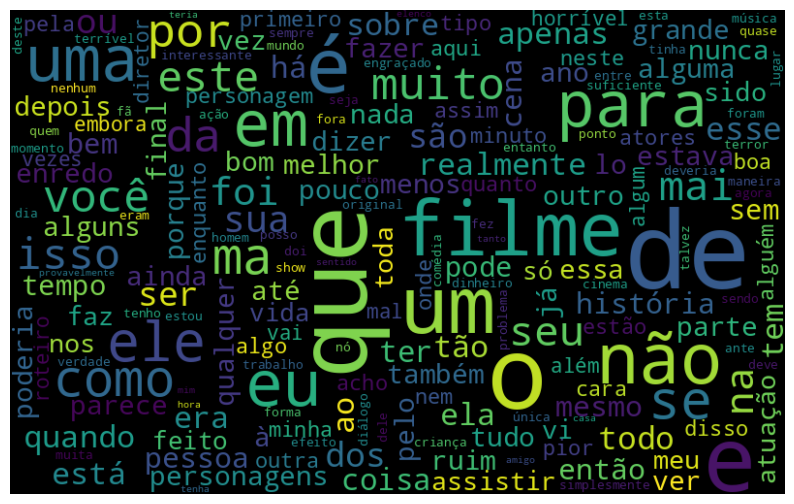

In [39]:
nuvem_palavras_neg(resenha, "text_pt")

In [42]:
import nltk
from nltk import tokenize

# realiza a tokenização do texto
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)

frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})




In [43]:
# imprime um data frame com as palavras ordenadas pelas q tem a maior frequencia
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915
